In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:07<00:00, 272MB/s]
100% 1.06G/1.06G [00:07<00:00, 147MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [9]:
# Creating batches with generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
#normalize
def process(image,label):
  iamge = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [11]:
#creating CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid' ,activation='relu' ,input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3), padding='valid' ,activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3), padding='valid', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation= 'sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy' ,metrics=['accuracy'])

In [14]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 101ms/step - loss: 1.2573 - accuracy: 0.5898 - val_loss: 0.7486 - val_accuracy: 0.6302
Epoch 2/10
625/625 [==============================] - 84s 134ms/step - loss: 0.5604 - accuracy: 0.7168 - val_loss: 0.5382 - val_accuracy: 0.7378
Epoch 3/10
625/625 [==============================] - 74s 117ms/step - loss: 0.4751 - accuracy: 0.7746 - val_loss: 0.4769 - val_accuracy: 0.7758
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4133 - accuracy: 0.8148 - val_loss: 0.5934 - val_accuracy: 0.7010
Epoch 5/10
625/625 [==============================] - 69s 110ms/step - loss: 0.3692 - accuracy: 0.8382 - val_loss: 0.4277 - val_accuracy: 0.8094
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2820 - accuracy: 0.8815 - val_loss: 0.4835 - val_accuracy: 0.8012
Epoch 7/10
625/625 [==============================] - 69s 109ms/step - loss: 0.2109 - accuracy: 0.9154 - val_loss: 0.4962 - val_ac

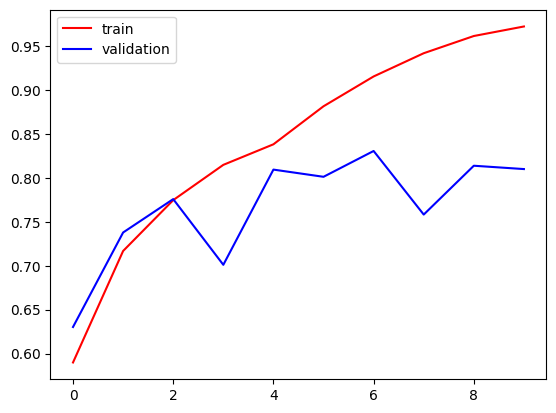

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

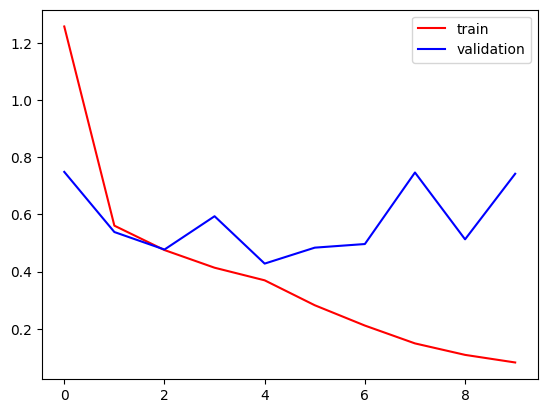

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#Reducing complexity and add more data

In [17]:
import cv2

In [103]:
test_image=cv2.imread('/content/dog 1.jfif')

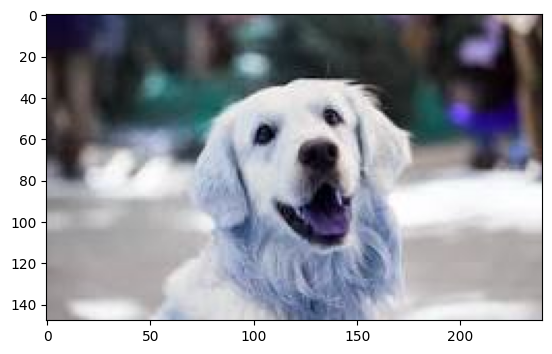

In [104]:
plt.imshow(test_image)

In [105]:
test_image.shape

(148, 240, 3)

In [106]:
test_image=cv2.resize(test_image,(256,256))

In [107]:
test_input = test_image.reshape(1,256,256,3)

In [108]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[0.9674274]], dtype=float32)

In [110]:
round(0.9674274)

1